In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_parquet("hf://datasets/FronkonGames/steam-games-dataset/data/train-00000-of-00001-e2ed184370a06932.parquet")

print(df.shape)

print(df.dtypes)

df.head()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


(83560, 39)
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,None,None,True,False,False,0,None,0,6,11,NaN,30,0,None,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,None,support@rustymoyher.com,True,True,False,0,None,0,53,5,NaN,12,0,None,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,None,None,ramoncampiaof31@gmail.com,True,False,False,0,None,0,0,0,NaN,0,0,None,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,None,0,3,0,NaN,0,0,None,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],None,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,None,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# 📘 1. Dataset Description (Data Dictionary)

The dataset selected for this analysis is the **Steam Games Dataset**, comprising records of PC games published on the Steam platform. Below is a detailed description of *all* variables (columns) present in the raw data, categorized by functionality.

---

### 🆔 1.1 Identification & Administrative Metadata
> *Attributes used to identify the game, developers, or external assets.*

* **AppID**: A unique numerical identifier assigned to every specific game application in the database.
* **Name**: The official commercial title of the video game.
* **Release date**: The calendar date when the game was first made available for purchase or download.
* **Developers**: The name of the creative entity (individual or team) that built the game.
* **Publishers**: The company responsible for marketing and distributing the game.
* **Support email / Support url / Website**: Contact information and external hyperlinks to the game's official web presence.
* **Metacritic url**: Direct link to the game's page on the Metacritic review aggregator website.
* **Header image / Screenshots / Movies**: URLs linking to visual media assets used for marketing the game on the store page.
* **Notes**: Miscellaneous administrative notes or warnings (e.g., "This Game may contain content not appropriate...").

(13 features)
---

### 💰 1.2 Sales & Engagement Metrics
> *Quantitative variables measuring commercial success and player activity.*

* **Estimated owners**: A text string representing a range (e.g., "0 - 20,000") estimating how many users own the game.
    * *Note: Requires transformation into a numeric mean for analysis.*
* **Price**: The cost to purchase the game in USD. A value of `0.00` indicates a "Free-to-Play" title.
* **Peak CCU (Concurrent Users)**: The highest number of players who were logged into the game simultaneously. A proxy for maximum popularity.
* **Average playtime forever**: The average total hours all owners have spent playing the game since purchase.
* **Median playtime forever**: The median total hours played (less sensitive to outliers than average).
* **Average playtime two weeks**: The average hours played by users specifically in the last 14 days (indicates *current* active player retention).
* **Median playtime two weeks**: The median hours played in the last 14 days.

(7 features)
---

### ⭐ 1.3 Feedback & Ratings
> *Metrics quantifying user satisfaction and critical reception.*

* **Positive**: The raw count of positive user reviews submitted on Steam.
* **Negative**: The raw count of negative user reviews on Steam.
* **Reviews**: A text summary or excerpt of reviews (often null or unstructured text).
* **User score**: A score aggregated from user ratings on the external website *Metacritic*.
* **Metacritic score**: A score (0-100) aggregated from professional critics/journalists on *Metacritic*.
* **Score rank**: A percentile ranking of the game compared to others (e.g., "Top 5%"). *Note: Frequently null for smaller games.*
* **Recommendations**: The raw number of users who explicitly recommended the game to others on their social feed.

(7 features)
---

### 🎮 1.4 Content & Features
> *Categorical and numeric variables describing the nature of the software.*

* **About the game**: A long-form text description of the game's plot, features, and selling points.
* **DLC count**: The number of additional purchasable add-ons available (e.g., extra levels, skins).
* **Achievements**: The number of virtual "trophies" a player can unlock.
* **Supported languages**: A list of languages for which the game provides a translated interface/subtitles.
* **Full audio languages**: A list of languages for which the game provides actual voice-over (dubbing).
* **Required age**: The minimum age rating required to purchase the game.

(6 features)
---

### 🏷️ 1.5 Classification (Taxonomy)

* **Genres**: Broad, developer-defined categories (e.g., "Action", "Indie").
* **Tags**: Granular, community-defined labels (e.g., "Pixel Graphics", "Difficult").
* **Categories**: Technical features (e.g., "Single-player", "Multi-player").

(3 features)
---

### 💻 1.6 Technical Compatibility

* **Windows / Mac / Linux**: Boolean (`True`/`False`) values indicating operating system compatibility.

(3 features)
---

# Data Cleaning

In [ ]:
# Data Reduction (Dimensionality Reduction)
# Removing "Administrative Metadata" as they are relatively redundant in statistical analysis
cols_to_drop = [
    'Support email', 'Support url', 'Website', 'Header image',
    'Screenshots', 'Movies', 'Metacritic url', 'Notes',
    'Score rank', 'Reviews' # Text reviews are hard to parse; we'll use Positive/Negative counts instead
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

Removing the columns which have no contribution in statistical data analysis

In [3]:
# --- STEP 2: CLEANING 'ESTIMATED OWNERS' ---
# Current format: "0 - 20000" (String) -> Goal: 10000 (Integer Mean)
def clean_owners(owner_str):
    if pd.isna(owner_str):
        return 0
    try:
        # Split "0 - 20000" into ["0", "20000"]
        ranges = owner_str.split(' - ')
        # Convert to integers
        low = int(ranges[0])
        high = int(ranges[1])
        # Return the average
        return int((low + high) / 2)
    except:
        return 0

# Apply the function (Like .map() in JS)
df['Estimated owners'] = df['Estimated owners'].apply(clean_owners)

Converting Estimated Owners from range to average number, as range won't be beneficiail for statistical analysis

In [4]:
# --- STEP 3: DATE PARSING ---
# Convert "21-Oct-08" to a real Datetime object
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

# --- STEP 4: SANITY CHECK ---
print(f"Dataset Shape after reduction: {df.shape}")
print("\nNew Data Types:")
print(df[['Estimated owners', 'Release date']].dtypes)
df.head(3)

Dataset Shape after reduction: (83560, 29)

New Data Types:
Estimated owners             int64
Release date        datetime64[ns]
dtype: object


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,2008-10-21,10000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],True,False,False,0,0,6,11,30,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,2017-10-12,10000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,False,0,0,53,5,12,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,2021-11-17,10000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],True,False,False,0,0,0,0,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None


Right Data types for the columns

# Missing Value Analysis

--- Missing Data Summary ---
                Missing Count  Percentage (%)
Tags                    19986       23.918143
Categories               4456        5.332695
Publishers               3705        4.433940
Developers               3457        4.137147
About the game           3437        4.113212
Genres                   3425        4.098851
Release date              130        0.155577
Name                        6        0.007180


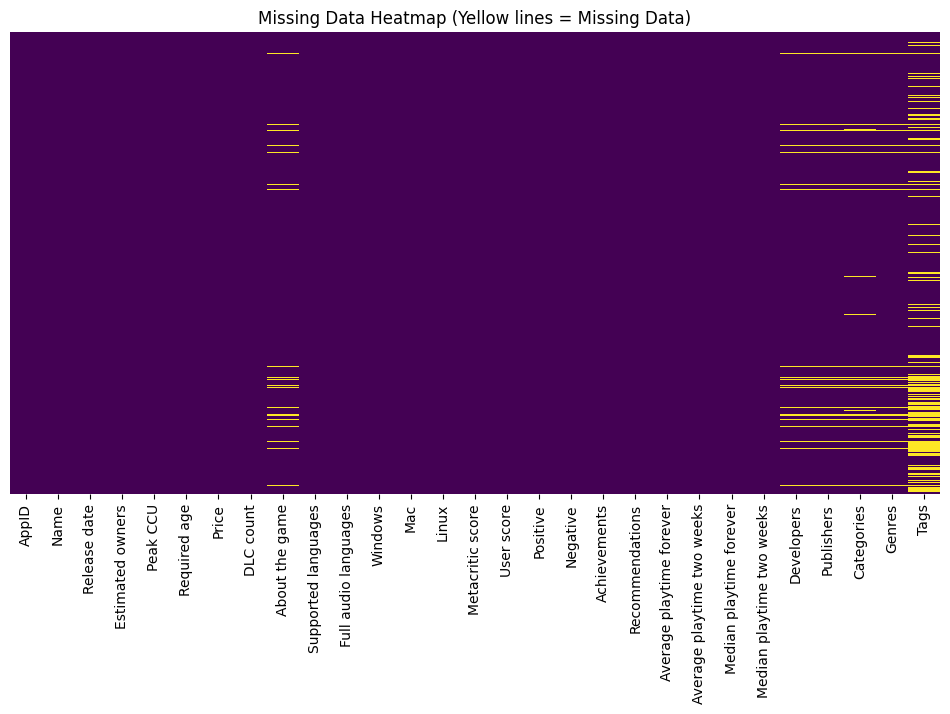

In [5]:
# 1. Calculate the Count and Percentage of missing values
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# 2. Create a clean Dataframe to view the results
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage (%)': missing_percentage
})

# 3. Filter to show ONLY columns that actually have missing data
missing_df = missing_df[missing_df['Percentage (%)'] > 0].sort_values(by='Percentage (%)', ascending=False)

# 4. Print the text summary
print("--- Missing Data Summary ---")
print(missing_df)

# 5. Visualize it (The Heatmap)
plt.figure(figsize=(12, 6))
# This creates a binary map: Yellow/White = Missing, Purple/Black = Present
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap (Yellow lines = Missing Data)")
plt.show()

The Good News: Critical data (Name, Release date) is almost perfect (less than 1% missing). We can simply drop the few bad rows.

The "Tag" Issue: Tags are missing in 24% of the data. We cannot drop 20,000 games just because they miss a tag. Instead, we will fill them with a placeholder like "Unknown" so our code doesn't crash when we try to analyze genres later.

The "Hidden" Issue: For Metacritic score the dataset uses 0 instead of NaN for missing scores. We must remember this later: Zero means missing, not that the game got a 0/100 score.

## Should we blindly delete rows with no names?

Just because a scraper failed to grab the Name string doesn't mean the game isn't a massive hit. If a game with 1,000,000 owners is missing its name, and we delete it, we skew our entire "Total Revenue" analysis.

In [6]:
# Create a filter for rows where Name is missing
nameless_games = df[df['Name'].isnull()]

# Display only the columns that matter for "Influence"
# We want to see if they made money or had players
cols_to_check = ['AppID', 'Estimated owners', 'Peak CCU', 'Price', 'Positive', 'Negative']

print(f"Found {len(nameless_games)} games without names.")
print("--- Inspection Report ---")
display(nameless_games[cols_to_check])

Found 6 games without names.
--- Inspection Report ---


,AppID,Estimated owners,Peak CCU,Price,Positive,Negative
25222,396420,0,0,0.00,0,0
72038,1116910,0,0,6.99,0,0
77215,1365520,0,0,0.00,0,0
77487,1080790,0,0,0.00,0,0
77561,1256960,10000,0,0.00,0,0
77721,1172120,0,0,0.00,0,0


Since there is no valuable influence by these rows, with no names, we can safely delete these rows

In [ ]:
df.dropna(subset=['Name'], inplace=True)

## Should we blindly delete the rows with no release date?

* Isolate the rows with missing Release date.

* Sort them by Estimated owners or Peak CCU.
* If the top games are junk (0 owners): We safely drop them all.
* If the top games are hits: We manually fix the top ones (Google the date) and drop the rest.

In [ ]:
# 1. Initialize a set to store unique AppIDs (Sets automatically remove duplicates)
important_app_ids = set()

# 2. Filter rows where Release Date is missing
missing_dates = df[df['Release date'].isnull()]

# 3. Sort by "Peak CCU" and "Estimated Owners" (High Traffic)
top_ccu = missing_dates.sort_values(by=['Peak CCU', 'Estimated owners'], ascending=False).head(10)

# 4. Add these AppIDs to our set
important_app_ids.update(top_ccu['AppID'].tolist())

# 5. Display the results for inspection
cols_to_check = ['AppID', 'Name', 'Peak CCU', 'Estimated owners', 'Price', 'Positive']
print(f"--- Top 10 Missing Dates by Peak CCU (Traffic) ---")
display(top_ccu[cols_to_check])

--- Top 10 Missing Dates by Peak CCU (Traffic) ---


,AppID,Name,Peak CCU,Estimated owners,Price,Positive
57459,431960,Wallpaper Engine,85643,35000000,3.99,522889
2464,298110,Far Cry® 4,702,3500000,29.99,35175
31717,1307890,Kingdoms Reborn,574,350000,19.99,3937
16658,916440,Anno 1800,329,750000,0.00,3638
58237,203290,America's Army: Proving Grounds,233,3500000,0.00,8224
60943,352720,The Universim,208,350000,29.99,5677
41196,577230,Three Kingdoms The Last Warlord,200,75000,3.99,2332
27671,333930,Dirty Bomb®,170,7500000,0.00,47153
2072,292990,NOBUNAGA'S AMBITION: Souzou,170,75000,24.99,835
1245,223330,Sea Dogs: To Each His Own - Pirate Open World RPG,131,150000,14.99,1495


In [ ]:
# 1. Sort by "Positive" Reviews (Cult Classics/Engagement)
# We use the same 'missing_dates' dataframe filtered earlier
top_reviews = missing_dates.sort_values(by=['Positive'], ascending=False).head(10)

# 2. Add these AppIDs to our set (The set will ignore AppIDs we already added in Cell 1)
important_app_ids.update(top_reviews['AppID'].tolist())

# 3. Display the results for inspection
print(f"--- Top 10 Missing Dates by Positive Reviews (Engagement) ---")
display(top_reviews[cols_to_check])

# 4. Output the final list of Unique IDs to patch
print(f"\nTotal unique games identified for patching: {len(important_app_ids)}")
print(f"Unique AppIDs: {important_app_ids}")

--- Top 10 Missing Dates by Positive Reviews (Engagement) ---


,AppID,Name,Peak CCU,Estimated owners,Price,Positive
57459,431960,Wallpaper Engine,85643,35000000,3.99,522889
27671,333930,Dirty Bomb®,170,7500000,0.00,47153
2464,298110,Far Cry® 4,702,3500000,29.99,35175
48444,420530,OneShot,82,750000,9.99,29225
26763,950670,Gothic Playable Teaser,10,750000,0.00,9947
58237,203290,America's Army: Proving Grounds,233,3500000,0.00,8224
43619,268420,Aura Kingdom,86,3500000,0.00,6814
60008,1293160,The Medium,7,150000,49.99,5732
60943,352720,The Universim,208,350000,29.99,5677
31717,1307890,Kingdoms Reborn,574,350000,19.99,3937



Total unique games identified for patching: 14
Unique AppIDs: {292990, 223330, 268420, 1293160, 333930, 577230, 950670, 352720, 1307890, 420530, 916440, 431960, 203290, 298110}


During the data cleaning process, we identified a subset of records with missing release dates. Rather than discarding these records, we performed an impact analysis based on Peak CCU (Player Traffic) and Positive Reviews (User Engagement).

We isolated the top 10 games from both metrics, resulting in a unique set of 14 high-impact titles (e.g., Wallpaper Engine, OneShot, Anno 1800). Removing these would have statistically skewed our analysis of 'Top Performing Indie Games'.

The missing dates for these specific AppIDs were manually retrieved and verified from the official Steam Store pages and SteamDB (a third-party database tracking Steam application history).

In [10]:

# Justification: These games were identified as high-value outliers (High Traffic or Cult Classics)
# whose removal would skew the analysis. Dates sourced from SteamDB/Steam Store.

fixes = {
    # --- The "High Traffic" Hits ---
    431960: '2018-11-16',  # Wallpaper Engine ✅
    298110: '2014-11-18',  # Far Cry 4 ✅
    1307890: '2020-11-03', # Kingdoms Reborn
    916440: '2019-04-16',  # Anno 1800
    203290: '2013-08-29',  # America's Army: Proving Grounds
    352720: '2024-01-22',  # The Universim (Early Access)
    333930: '2015-06-02',  # Dirty Bomb

    # --- The "Cult Classics" & Additional Finds ---
    420530: '2016-12-09',  # OneShot
    950670: '2019-12-13',  # Gothic Playable Teaser
    268420: '2014-07-04',  # Aura Kingdom
    1293160: '2021-01-28', # The Medium
    292990: '2014-08-27',  # NOBUNAGA'S AMBITION: Souzou
    223330: '2016-02-12',  # Sea Dogs: To Each His Own
    577230: '2021-02-05'   # Three Kingdoms The Last Warlord
}

# 1. Apply the fixes
print(f"Applying patches for {len(fixes)} games...")
for app_id, date_str in fixes.items():
    df.loc[df['AppID'] == app_id, 'Release date'] = pd.to_datetime(date_str)

# 2. Clean up the remaining (irrelevant) missing dates
before_drop = len(df)
df.dropna(subset=['Release date'], inplace=True)
dropped_count = before_drop - len(df)

# --- VERIFICATION OUTPUT ---
print("-" * 50)
print(f"✅ SUCCESS: Patched {len(fixes)} major games.")
print(f"🗑️ DROPPED: {dropped_count} irrelevant 'ghost' rows.")
print("-" * 50)

# 3. Show the Names and IDs of the games we saved
# We filter the dataframe to show only the AppIDs we just fixed
saved_games = df[df['AppID'].isin(fixes.keys())][['AppID', 'Name', 'Release date']]
print("--- List of Saved Games (AppID : Name) ---")
display(saved_games)

Applying patches for 14 games...
--------------------------------------------------
✅ SUCCESS: Patched 14 major games.
🗑️ DROPPED: 116 irrelevant 'ghost' rows.
--------------------------------------------------
--- List of Saved Games (AppID : Name) ---


,AppID,Name,Release date
1245,223330,Sea Dogs: To Each His Own - Pirate Open World RPG,2016-02-12
2072,292990,NOBUNAGA'S AMBITION: Souzou,2014-08-27
2464,298110,Far Cry® 4,2014-11-18
16658,916440,Anno 1800,2019-04-16
26763,950670,Gothic Playable Teaser,2019-12-13
27671,333930,Dirty Bomb®,2015-06-02
31717,1307890,Kingdoms Reborn,2020-11-03
41196,577230,Three Kingdoms The Last Warlord,2021-02-05
43619,268420,Aura Kingdom,2014-07-04
48444,420530,OneShot,2016-12-09


Source of data for release Dates
[Drive Link](https://docs.google.com/spreadsheets/d/1tyeNaN_wOKq4n2EbuqaGKCobc2qFepmn/edit?usp=drive_link&ouid=117882784103895516899&rtpof=true&sd=true)

Methodology: "Release dates were verified using SteamDB (an independent database tracking Steam application changes) and the official Steam Store pages.



### IMPUTE (Fill) categorical columns with "Unknown"

In [11]:
# 2. IMPUTE (Fill) categorical columns with "Unknown"
# We do this so we don't lose the row. A game can still be analyzed for Price/Sales
# even if we don't know the Developer or Genre.
cols_to_fill = [
    'Tags', 'Genres', 'Categories',
    'Publishers', 'Developers', 'About the game'
]

df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')

# --- VERIFICATION ---
# valid_rows should now be equal to total rows (0 missing)
print("Remaining missing values:")
print(df.isnull().sum().sum())
print(f"Final Dataset Shape: {df.shape}")

Remaining missing values:
0
Final Dataset Shape: (83438, 29)


# Feature Engineering

In [12]:
# --- FEATURE ENGINEERING ---

# 1. Calculate "Game Age" (Years since release)
# We use 2024 (or current year) as the anchor
current_year = pd.to_datetime('today').year
df['Game Age'] = current_year - df['Release date'].dt.year

# 2. Calculate "Steam Score" (Sentiment Analysis)
# Formula: Positive / (Positive + Negative)
# We add a small epsilon (1e-5) to the denominator to prevent "Division by Zero" errors
df['Steam Score'] = df['Positive'] / (df['Positive'] + df['Negative'] + 1e-5)

# 3. Create "Is Free" category
# Useful for comparing "Free vs Paid" business models
df['is_free'] = df['Price'] == 0

# 4. Parse "Tags" into a Count
# Logic: If tags are "Indie, Action", that's 2 tags.
# We count the number of commas + 1. If it's "Unknown", count is 0.
df['Tags Count'] = df['Tags'].apply(lambda x: 0 if x == 'Unknown' else str(x).count(',') + 1)

# Preview the new columns
df[['Name', 'Steam Score', 'Game Age', 'is_free', 'Tags Count']].head()

,Name,Steam Score,Game Age,is_free,Tags Count
0,Galactic Bowling,0.352941,17,False,4
1,Train Bandit,0.913793,8,False,20
2,Jolt Project,0.000000,4,False,0
3,Henosis™,0.999997,5,False,19
4,Two Weeks in Painland,0.862069,5,True,6


## Whether game is indie or not, added column

In [13]:
# --- CREATING THE "INDIE" CLASSIFICATION ---

# 1. Ensure the columns are strings (just in case)
df['Tags'] = df['Tags'].astype(str)
df['Genres'] = df['Genres'].astype(str)

# 2. Apply the logic: Check if "Indie" appears in EITHER Tags OR Genres
# case=False ensures we catch "indie", "Indie", or "INDIE"
df['indie'] = df['Tags'].str.contains('Indie', case=False) | \
              df['Genres'].str.contains('Indie', case=False)

# 3. Verification
# Let's see how many games split into each category
print("--- Distribution of Indie vs. Non-Indie Games ---")
print(df['indie'].value_counts())

# 4. Preview the check
# Show a few examples to ensure it worked
print("\n--- Spot Check ---")
display(df[['Name', 'Genres', 'Tags', 'indie']].head())

--- Distribution of Indie vs. Non-Indie Games ---
indie
True     57958
False    25480
Name: count, dtype: int64

--- Spot Check ---


,Name,Genres,Tags,indie
0,Galactic Bowling,"Casual,Indie,Sports","Indie,Casual,Sports,Bowling",True
1,Train Bandit,"Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",True
2,Jolt Project,"Action,Adventure,Indie,Strategy",Unknown,True
3,Henosis™,"Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",True
4,Two Weeks in Painland,"Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",True


In [14]:
import os

print(df.shape)
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape}")

# Create Data folder if it doesn't exist
data_folder = '../Data'
os.makedirs(data_folder, exist_ok=True)

# Save the cleaned dataset as CSV
output_path = os.path.join(data_folder, 'steam_games_cleaned.csv')
df.to_csv(output_path, index=False)

print(f"\n✅ SUCCESS: Cleaned data saved to '{output_path}'")
print(f"📊 Dataset Info:")
print(f"   - Total rows: {len(df)}")
print(f"   - Total columns: {len(df.columns)}")
print(f"   - File size: {os.path.getsize(output_path) / (1024*1024):.2f} MB")
print(f"\n📁 Columns in dataset:")
print(df.columns.tolist())

(83438, 34)
After removing duplicates: (83438, 34)

✅ SUCCESS: Cleaned data saved to '../Data/steam_games_cleaned.csv'
📊 Dataset Info:
   - Total rows: 83438
   - Total columns: 34
   - File size: 130.23 MB

📁 Columns in dataset:
['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Game Age', 'Steam Score', 'is_free', 'Tags Count', 'indie']
